# Problem set - chapter 3

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Problem 3.1 - Messy probability density

Suppose that a probability density is given by the following function:

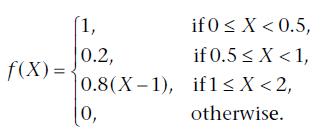

**Problem 3.1.1** Demonstrate that the above density is a valid probability distribution.

**Answer**: to be a valid probability distribution, the function has to meet the following criterias
* All values of the distribution must be real non-negative numbers. All values are positive for all x's in the real numbers. ✅
* The sum (for discrete) or the integration (for continuous) of all values of the distribution must be equal to 1 ✅

Given that X is a continuous variable, the integration of the function is:

$$
\int{f(X)} = \int_{0}^{0.5}{1 \cdot dX} + \int_{0.5}^{1}{0.2 \cdot dX} + \int_{1}^{2}{0.8(X-1) \cdot dX}\\
\int{f(X)} = X\bigg\rvert_{0}^{0.5} + 0.2X\bigg\rvert_{0.5}^{1} + 0.8\bigg(\frac{X^2}{2} - X\bigg)\bigg\rvert_{1}^{2}\\
\int{f(X)} = 0.5 + 0.1 + 0.4 = 1
$$



**Problem 3.1.2** What is the probability that 0.2 ≤ X ≤ 0.5?

**Answer**: The probability that 0.2 ≤ X ≤ 0.5 is the area under the curve between 0.2 and 0.5.

$$
\int_{0.2}^{0.5}{f(X)} = \int_{0.2}^{0.5}{1 \cdot dX} = X\bigg\rvert_{0.2}^{0.5} = 0.5 - 0.2 = 0.3

**Problem 3.1.3** Find the mean of the distribution.

**Answer**: The mean of the distribution is the expected value of X, which is the area under the curve between 0 and 2, multiplied by X.

$$
\mathbf{E}[X] = \int_{0}^{2}{X \cdot f(X)} = \int_{0}^{0.5}{X \cdot 1 \cdot dX} + \int_{0.5}^{1}{X \cdot 0.2 \cdot dX} + \int_{1}^{2}{X \cdot 0.8(X-1) \cdot dX}\\
\mathbf{E}[X] = \frac{X^2}{2}\bigg\rvert_{0}^{0.5} + 0.2\frac{X^2}{2}\bigg\rvert_{0.5}^{1} + 0.8\bigg(\frac{X^3}{3} - \frac{X^2}{2}\bigg)\bigg\rvert_{1}^{2} = 0.866\overline{7}
$$

**Problem 3.1.4** What is the median of the distribution?

**Answer**: The median is the point in which $P(X \leq x) = 0.5$. The $x$ value that satisfies this condition is $x=0.5$

## Problem 3.2 - Keeping it discrete

Suppose that the number of heads $X$ obtained in a series of $N$ coin flips is described by a binomial distribution:

$$
Pr(X = K|\theta) = \binom{N}{K}\theta^K(1-\theta)^{N-K},
$$

where $\binom{N}{K}=\frac{N!}{(K!(N-K)!)}$ is the binomial coefficient and $\theta$ is the probability of obtaining a head in any particular throw.


**Problem 3.2.1** Suppose that $\theta = 0.5$ (that is, the coin is fair). Calculate the probability of
obtaining 5 heads in 10 throws.

**Answer**: The probability of obtaining 5 heads in 10 throws is **0.246**

In [2]:
# Create probability function
def bincoeff(N, K):
    return np.math.factorial(N)/(np.math.factorial(K)*np.math.factorial(N-K))

def prob(theta, N, K):
    return bincoeff(N, K)*theta**K*(1-theta)**(N-K)

# Calculate probability of getting 5 heads in 10 tosses
prob(0.5, 10, 5)

0.24609375

**Problem 3.2.2** Calculate the probability of obtaining fewer than 3 heads.

**Answer**: The probability of obtaining fewer than 3 heads is **0.054**

In [3]:
pr = 0
for i in range(0, 3):
    pr += prob(0.5, 10, i)
pr

0.0546875

**Problem 3.2.3** Find the mean of this distribution. You can either derive the mean of this
distribution or take it as given that $\mathbf{E}[X] = N\theta$.

**Answer**: Using the expression provided, the mean of the distribution is $N\theta = 10 \cdot 0.5 = 5$

**Problem 3.2.4** Suppose I flip another coin with $\theta = 0.2$. What is the probability that I get more
than 8 heads?

**Answer**: The probability of obtaining more than 8 heads is $Pr(X > 8|\theta=0.2) = 1 - Pr(X \leq 8|\theta=0.2) \approx 4.2\times 10^{-6}$

In [4]:
# This is the way the book does it (summing Pr from 9 to 10)
pr = 0
for i in range(9, 11):
    pr += prob(0.2, 10, i)
pr

4.198400000000002e-06

In [5]:
# This is my approach (summing Pr from 0 to 8, and then subtracting from 1)
pr = 0
for i in range(0, 9):
    pr += prob(0.2, 10, i)
print(1 - pr)

4.198399999433278e-06


**Problem 3.2.5** What is the probability that I obtain fewer than 3 heads in 10 flips of the first
coin, and more than 8 heads with the second?

**Answer**: As the two events are independent (the result of one does not affect the result of the other), the probability of both events happening is the product of the probabilities of each event happening.

$$
Pr(X < 3|\theta=0.5) \cdot Pr(X > 8|\theta=0.2) \approx 0.054 \cdot 4.2\times 10^{-6} \approx 2.3\times 10^{-7}

In [6]:
0.0546875 * 4.198399999433278e-06

2.2959999996900737e-07

## Problem 3.3 - Continuously confusing

Suppose that the time that elapses before a particular component on the Space Shuttle fails can
be modelled as being exponentially distributed:

$$
p(t|\lambda) = \lambda e^{-\lambda t},
$$

where $\lambda$ is the rate parameter.

**Problem 3.3.1** Show the above distributuion is a valid probability distribution.

**Answer**: to be a valid probability distribution, the function has to meet the following criterias
* All values of the distribution must be real non-negative numbers. Given that $t$ represents time and $\lambda>0$, the distribution is always positive for all $t$ and $\lambda$ in the real numbers. ✅
* The sum (for discrete) or the integration (for continuous) of all values of the distribution must be equal to 1 ✅

$$
\int_{0}^{\infty}{\lambda e^{-\lambda t}} = \frac{-\lambda e^{-\lambda t}}{\lambda}\bigg\rvert_{0}^{\infty} = 1
$$

**Problem 3.3.2** Find the mean of this distribution.

**Answer**: The mean of the distribution is the integration of the function multiplied by $t$. Using integration by parts:

$$
\mathbf{E}[t] = \int_{0}^{\infty}{t \cdot \lambda e^{-\lambda t}} = \lambda\bigg[-\frac{t e^{-\lambda t}}{\lambda} - \frac{e^{- \lambda t}}{\lambda}\bigg]_{0}^{\infty} = \frac{1}{\lambda}
$$

**Problem 3.3.3** Suppose that $λ = 0.2$ per hour. Find the probability that the component fails in
the first hour of flight.

**Answer**: The probability that the component fails in the first hour of flight is the area under the curve between 0 and 1. Hence, $P(t0 \leq t \leq 1|\lambda=0.2) \approx 0.181$

In [7]:
# Exponential function
def exp(lmda, t):
    return -np.exp(-lmda*t)

# Calculate probability of the component failing within the first hour
print(exp(0.2, 1) - exp(0.2, 0))

0.18126924692201818


**Problem 3.3.4** What is the probability that the component survives for the first hour but fails during the second?

**Answer** The probability is defined as $P(1 \le t \leq 2|\lambda=0.2) \approx 0.148$

In [8]:
print(exp(0.2, 2) - exp(0.2, 1))

0.1484107070423425


**Problem 3.3.5** What is the probability that the component fails during the second hour given that it has survived the first?

**Answer**: This is the conditional probability

$$
P(1 \leq t \leq 2|t \geq 1, \lambda=0.2) = \frac{P(1 \leq t \leq 2|\lambda=0.2)}{P(t \geq 1|\lambda=0.2)} = \frac{0.148}{0.818} \approx 0.181

In [9]:
# Prob of failing between 1 and 2 hours
print(exp(0.2, 2) - exp(0.2, 1))

# Prob of failing after 1 hour
print(1 - (exp(0.2, 1) - exp(0.2, 0)))

#The conditional probability
print((exp(0.2, 2) - exp(0.2, 1))/(1 - (exp(0.2, 1) - exp(0.2, 0))))

0.1484107070423425
0.8187307530779818
0.18126924692201807


**Problem 3.3.6** Show that the probability of the component failing during the $(n +1)th$ hour given that it has survived $n$ hours is always $0.18$.

**Answer**: This demostration is the memoryless property of the exponential distribution.

$$
P(n \leq t \leq n+1 | t \geq n) = \frac{P(n \leq t \leq n+1)}{P(t \geq n)} = \frac{-e^{\lambda t}\bigg\rvert_{n}^{n+1}}{1 + e^{\lambda t}\bigg\rvert_{0}^{n}} = \frac{e^{-\lambda n}-e^{-\lambda (n+1)}}{e^{-\lambda n}} = 1 - e^{-\lambda} \approx 0.181
$$

Therefore, no matter the number of hours the component has survived, the probability of failing in the next hour is always $0.181$

In [10]:
1-np.exp(-0.2)

0.18126924692201818

The memoryless property is interesting because it means that the proportion between the area under the curve between $n$ and $n+1$ and the area under the curve between $n$ and $\infty$  is constant for all $n$.

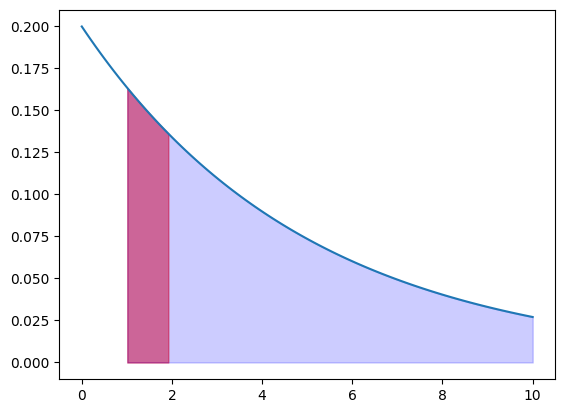

In [11]:
# plot the exponential distribution
lmda = 0.2
x = np.linspace(0, 10, 100)
y = lmda * np.exp(-lmda * x)
plt.plot(x, y)

# Fill in the area under the curve between 1 and 2 hours and after 1 hour
plt.fill_between(x, y, where = (x > 1) & (x < 2), color = 'red', alpha = 0.5)
plt.fill_between(x, y, where = (x > 1), color = 'blue', alpha = 0.2)

plt.show()

In [12]:
# Probaility of failing in the first hour
exp(0.2, 1) - exp(0.2, 0)

0.18126924692201818

In [13]:
# Probability of failing between 1 and 2 hours, given that it has not failed in the first hour
(exp(0.2, 2) - exp(0.2, 1)) / (1 - (exp(0.2, 1) - exp(0.2, 0)))

0.18126924692201807

In [14]:
# Probability of failing between 2 and 3 hours, given that it has not failed in the first 2 hours
(exp(0.2, 3) - exp(0.2, 2)) / (1 - (exp(0.2, 2) - exp(0.2, 0)))

0.18126924692201823

## Problem 3.4 - The boy or girl paradox

The boy or girl paradox was first introduced by Martin Gardner in 1959. Suppose we are told the
following information:

**Problem 3.4.1** Mr Bayes has two children. The older child is a girl. What is the probability that
both children are girls?

**Answer**: The probability of having a girl is $1/2$, given that both events are independent and the older is a girl, the probaility of both children are girls is $1/2$:

Alternatively, we can count all possible events, in which each event has a probability of $1/4$:
$$
B-B\\
B-G\\
G-B\\
G-G\\
$$

Therefore, the probability of having both girls given that the older is a girl only occurs in one of the two possible events (GB or GG), hence $P = 1/2$. In this case, the new sample space is $2$.

**Problem 3.4.2** Mr Laplace has two children. At least one of the children is a girl. What is the
probability that both children are girls?

**Answer**: Counting all possible events, in which each event has a probability of $1/4$:
$$
B-B\\
B-G\\
G-B\\
G-G\\
$$

Only one event (GG) can be possible given that one of the children is a girl (BG, GB, GG), then, the probability is $P = 1/3$. In this case, the new sample space is $3$.

## Problem 3.5 Planet Scrabble
On a far-away planet suppose that people’s names are always two letters long, with each of these
letters coming from the 26 letters of the Latin alphabet. Suppose that there are no constraints
on individuals’ names, so they can be composed of two identical letters, and there is no need to
include a consonant or a vowel.

**Problem 3.5.1** How many people would need to be gathered in one place for there to be a 50%
probability that at least two of them share the same name?

**Answer**: The sample space is $26^2 = 676$, that means that there are $676$ names. Assume we start with a population of $3$ and we are interested on calculating the probability $Pr(X)$, in which $X$ is the number of individuals sharing the same name.

$$
\begin{align}
Pr(X=0) &= \frac{676}{676} \times \frac{675}{676} \times \frac{674}{676}\\
       &= \bigg(\frac{1}{676}\bigg)^3 \times (676 \times 675 \times 674)\\
       &= \bigg(\frac{1}{676}\bigg)^3 \times \frac{676!}{673!}\\
\end{align}
$$

In the previous expression, we are calculating the probability of none of the individuals sharing the same name $X=0$. In the first draw, we have a probability of $1$ or $(\frac{676}{676})$ of chosing a given name. In the second draw, we want to select any other name (because $X=0$), so the probability drops to $675/676$. In the third draw, we want to select any other name (because $X=0$), so the new probability takes into account that we dont expect to select the names we have drawn in the previous draws, hence $674/676$. This is also known as ***sampling without replacement.***

Generalizing $equation (3)$, we have the following expression in which the numerator is the **permutation without repetition** of $676$:
$$
\begin{align}
Pr(X=0) &= \frac{\frac{676!}{(676-n)!}}{676^n}\tag{4}\\
\end{align}
$$

Plotting $equation (4)$, we observe that $x=31$ is when the $Pr(X=0)$ is $50\%$, which means that there is a $50\%$ of having repeated names.


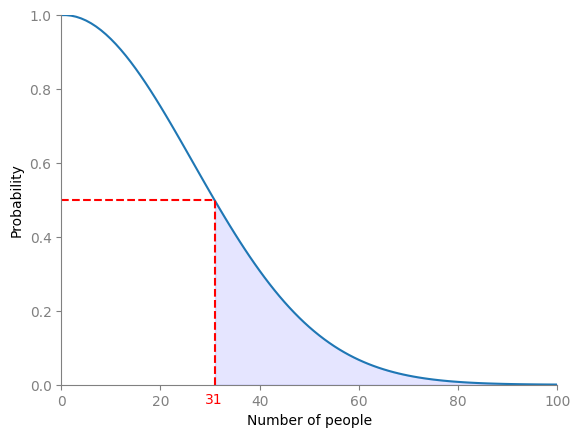

In [15]:
# Prob function P(X=0)
def prob(n)->float:
    return ((math.factorial(676))/(math.factorial(676 - n)))/(676 ** n)

# Define x and y
x = np.arange(0, 101, 1)
y = np.vectorize(prob)(x)

# Plot the distribution
plt.plot(x, y)

# Get closest x for which y = 0.5
x_50 = x[np.argmin(np.abs(y - 0.5))]


# Add horizontal line at y = 0.5 until touches the curve
plt.hlines(0.5, 0, x_50, colors = 'red', linestyles = 'dashed')

# Add vertical line at x = 31
plt.vlines(x_50, 0, 0.5, colors = 'red', linestyles = 'dashed')

# Add red label in x=31 and move to the x-axis with a padding of 3
plt.text(x_50 - 2, -0.05, '31', color = 'red')

# Remove the top and right spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add labels
plt.xlabel('Number of people')
plt.ylabel('Probability')

# y and x axis start at 0
plt.ylim(0, 1)
plt.xlim(0, 100)

# Set color of axis, ticks and tick labels to gray
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

# Fill the area under the curve between 31 and 100
plt.fill_between(x, y, where = (x >= 31), color = 'blue', alpha = 0.1)

plt.show()

**Problem 3.5.2**: Suppose instead that the names are composed of three letters. Now how many
people would need to be gathered in one place for there to be a 50% probability that at least two
of them share the same name?

**Answer**: The sample space is $26^3 = 17576$, that means that there are $17576$ possible names. Based on the previous problem, we can generalize the expression for $n$ individuals using three letters:

$$
\begin{align}
Pr(X=0) &= \frac{\frac{17576!}{(17576-n)!}}{17576^n}\tag{5}\\
\end{align}
$$

Plotting $equation (5)$, we observe that $x=84$ is when the $Pr(X=0)$ is $50\%$, which means that there is a $50\%$ of having repeated names.

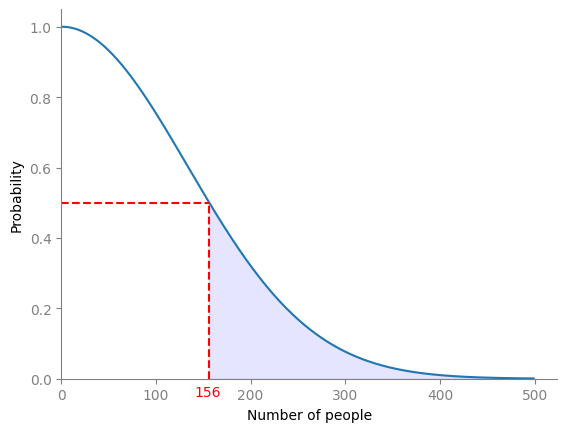

In [16]:
# Prob function P(X=0) - A log transformation is applied to avoid overflow errors
def prob(n) -> float:
    numerator = math.log(math.factorial(17576))
    denominator = math.log(math.factorial(17576 - n)) + n * math.log(17576)
    return math.exp(numerator - denominator)

# Define x and y
x = np.arange(0, 500, 1)
y = np.vectorize(prob)(x)

# Plot the distribution
plt.plot(x, y)

# Get closest x for which y = 0.5
x_50 = x[np.argmin(np.abs(y - 0.5))]


# Add horizontal line at y = 0.5 until touches the curve
plt.hlines(0.5, 0, x_50, colors='red', linestyles='dashed')

# Add vertical line at x=31
plt.vlines(x_50, 0, 0.5, colors='red', linestyles='dashed')

# Add red label in x=31 and move to the x-axis with a padding of 3
plt.text(x_50 - 15, -0.05, '156', color = 'red')

# Remove the top and right spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add labels
plt.xlabel('Number of people')
plt.ylabel('Probability')

# y and x axis start at 0
plt.ylim(0)
plt.xlim(0)

# Set color of axis, ticks and tick labels to gray
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

# Fill the area under the curve between 156 and 100
plt.fill_between(x, y, where=(x >= 156), color='blue', alpha=0.1)

plt.show()

## Problem 3.6 Game theory
A game show presents contestants with four doors: behind one of the doors is a car worth $1000;
behind another is a forfeit whereby the contestant must pay $1000 out of their winnings thus far
on the show. Behind the other two doors there is nothing. The game is played as follows:
1. The contestant chooses one of four doors.
2. The game show host opens another door, always to reveal that there is nothing behind it.
3. The contestant is given the option of changing their choice to one of the two remaining unopened
doors.
4. The contestant’s final choice of door is opened, to their delight (a car!), dismay (a penalty), or
indifference (nothing).

Assuming that:
* the contestant wants to maximise their expected wealth, and
* the contestant is risk-averse

what is the optimal strategy for the contestant?

**Answer**: Before choosing a door, the probability of any event $P(car), P(nothing), P(penalty)$ is $\big(\frac{1}{4},\frac{1}{2},\frac{1}{4} \big)$. After the host opens a door (that is empty), there are **two main** choices:
1. The contestant remains with the first decision, which does not modify the probabilities of the events $\big(\frac{1}{4},\frac{1}{2},\frac{1}{4} \big)$.
2. The contestant changes the decision, which modifies the probabilities of the events. This probabilities depend on the door the contestant chose first.

$$
\begin{align}
P(car) &= \frac{1}{4} \times 0 + \frac{1}{2} \times \frac{1}{2} + \frac{1}{4} \times \frac{1}{2} = \frac{3}{8}\\
P(nothing) &= \frac{1}{4} \times \frac{1}{2} + \frac{1}{2} \times 0 + \frac{1}{4} \times \frac{1}{2} = \frac{2}{8}\\
P(penalty) &= \frac{1}{4} \times \frac{1}{2} + \frac{1}{2} \times \frac{1}{2} + \frac{1}{4} \times 0 = \frac{3}{8}\\
\end{align}
$$

In these two choices (remains and changing), the **expected return** is the same:

$$
\begin{align}
\mathbf{E}[remain] &= \sum_{i=1}^{3}{x_i \cdot P(x_i)} = 1000 \times \frac{1}{4} + 0 \times \frac{1}{2} - 1000 \times \frac{1}{4} = 0\\
\mathbf{E}[change] &= \sum_{i=1}^{3}{x_i \cdot P(x_i)} = 1000 \times \frac{3}{8} + 0 \times \frac{2}{8} - 1000 \times \frac{3}{8} = 0\\
\end{align}
$$

Given that the expected return is the same, the contestant should choose the **less risky** option (given that risk-averse). To assess the risk in both choices, we can use the **variance** of the expected return:

$$
\begin{align}
\mathbf{Var}[remain] &= \sum_{i=1}^{3}{(x_i - \mathbf{E}[remain])^2 \cdot P(x_i)} = (1000 - 0)^2 \times \frac{1}{4} + (0 - 0)^2 \times \frac{1}{2} + (-1000 - 0)^2 \times \frac{1}{4} = 500000\\
\mathbf{Var}[change] &= \sum_{i=1}^{3}{(x_i - \mathbf{E}[change])^2 \cdot P(x_i)} = (1000 - 0)^2 \times \frac{3}{8} + (0 - 0)^2 \times \frac{2}{8} + (-1000 - 0)^2 \times \frac{3}{8} = 750000\\
\end{align}
$$

The variance of the expected return is higher when the contestant changes the decision, hence, the contestant should remain with the first decision.

In [17]:
(1/4)*(0 - 1000)**2+(1/2)*(0 - 0)**2+(1/4)*(0 - (-1000))**2

500000.0

In [18]:
(3/8)*(0 - 1000)**2+(2/8)*(0 - 0)**2+(3/8)*(0 - (-1000))**2

750000.0

## Problem 3.7 Blood doping in cyclists
Suppose, as a benign omniscient observer, we tally up the historical cases where professional
cyclists either used or did not use blood doping, and either won or lost a particular race. This
results in the probability distribution shown in the following table:

|         | Lost  | Won  |
|---------|-------|------|
| Clean   | 0.70  | 0.05 |
| Doping  | 0.15  | 0.10 |

**Problem 3.7.1**: What is the probability that a professional cyclist wins a race?

**Answer**: $P(win)=0.05+0.10=0.15$

**Problem 3.7.2** What is the probability that a cyclist wins a race, given that they have cheated?

**Answer**: $P(win|doping)=\frac{P(win \cap doping)}{P(doping)} = \frac{0.10}{0.25} = 0.40$

**Problem 3.7.3** What is the probability that a cyclist is cheating, given that they win?

**Answer**: There two ways to calculate this probability, both comes from the definition of the conditional probability and Bayes' theorem:
* This could be calculated using the conditional probability: $P(doping|win)=\frac{P(doping \cap win)}{P(win)} = \frac{0.10}{0.15} = 0.6\bar{6}$
* or, it could be calculated using Bayes' theorem: $P(doping|win)=\frac{P(win|doping)P(doping)}{P(win)} = \frac{0.40 \times 0.25}{0.15} = 0.6\bar{6}$


Now suppose that drug testing officials
have a test that can accurately identify a
blood-doper 90% of the time. However, it
incorrectly indicates a positive for clean athletes
5% of the time.

**Problem 3.7.4** If the officials want to maximize the proportion of people
correctly identified as dopers (ie. keep down the proportion of false positives), should they test all
the athletes or only the winners?

**Answer**: To answer this question, we have to calculate $P(doped|positive)$ for both cases: all athletes and only winners. For the first case we can use the Bayes' theorem:

$$
\begin{align}
P(doped|positive) &= \frac{P(positive|doped) \times P(doped)}{P(positive)}\\
                  &= \frac{P(positive|doped) \times P(doped)}{P(positive \cap doped) + P(positive \cap clean)}\\
                  &= \frac{P(positive|doped) \times P(doped)}{P(positive|doped) \times P(doped) + P(positive|clean) \times P(clean)}\\
                  &= \frac{0.90 \times 0.25}{0.9 \times 0.25 + 0.05 \times 0.75} \approx 0.857 \\
\end{align}
$$

The numerator in $(2)$ states that $P(positive)$ is the sum of being positive from the **True positives** and the **False positives**, and uses the conditional probability to calculate the probability of an athlete being dopped given that tested positive.
 


In [19]:
(0.9 * 0.25)/(0.9 * 0.25 + 0.05 * 0.75)

0.8571428571428571

For the second case (testing only winners), we can use a similar approach, considering the chain rule:

$$\begin{align}
P(A,B,C)&=P(C|A,B)P(A,B)\\
        &=P(C|A,B)P(B|A)P(A)\\
\end{align}
$$

which yields:

$$\begin{align}
P(A|B,C)&=\frac{P(A,B,C)}{P(B,C)}\tag{3}\\
        &=\frac{P(A,B,C)}{P(B,C)} \times \frac{P(C)}{P(C)}=\frac{\frac{P(A,B,C)}{P(C)}}{\frac{P(B,C)}{P(C)}}\tag{4}\\
        &=\frac{P(A,B|C)}{P(B|C)}\tag{5}\\
\end{align}
$$

Appliying $(5)$ to the problem, we have:

$$
\begin{align}
P(doped|positive,win) &= \frac{P(doped,positive|win)}{P(positive|win)}\tag{6}\\
\end{align}
$$

First, we are going to solve the numerator in $(6)$ using Bayes' theorem:

$$
\begin{align}
P(doped,positive|win) &= \frac{P(win|doped,positive) \times P(doped,positive)}{P(win)}\tag{7}\\
                      &= \frac{P(win|doped) \times P(doped, positive)}{P(win)}\tag{8}\\
                      &= \frac{P(win|doped) \times P(positive|doped)P(doped)}{P(win)}\tag{9}\\
                      &= \frac{0.4 \times 0.9 \times 0.25}{0.15} = 0.6\tag{10}\\
\end{align}
$$

In $(8)$, the assumption is that the probability of wining being doped is the same whether the athlete tested positive or not. In this case, knowing the test results does not change the probability of winning given that is doped. The author states that this assumption is fairly true, as long as the athletes are not more effective at hiding their drug use.

Then, we can solve the denominator in $(6)$:

$$
\begin{align}
P(positive|win) &= P(positive,doped|win) + P(positive,clean|win)\tag{11}\\
                &= P(positive|doped,win)P(doped|win) + P(positive|clean,win)P(clean|win)\tag{12}\\
                &= P(positive|doped)P(doped|win) + P(positive|clean)P(clean|win)\tag{13}\\
                &= 0.9 \times \frac{0.1}{0.15} +  0.05 \times \frac{0.05}{0.15} \approx 0.62 \tag{14}\\
\end{align}
$$

Replacing $(10)$ and $(14)$ in $(6)$, we have: $P(doped|positive,win) = \frac{0.6}{0.62} \approx 0.97$. Given that the probability of being doped is higher when the athlete is a winner, the officials should test only the winners. This makes sense, since they are a group which have a higher than average
percentage of dopers.

## Problem 3.8 Breast cancer revisited
Suppose that the prevalence of breast cancer for a randomly chosen 40-year-old woman in the
UK population is about 1%. Further suppose that mammography has a relatively high sensitivity
to breast cancer, where in 90% of cases the test shows a positive result if the individual has the
disease. However, the test also has a rate of false positives of 8%.

**Problem 3.8.1**: Show that the probability that a woman tests positive is about 9%.

**Answer**: the probability of testing positive is:

$$
\begin{align}
P(positive) &= P(\text{True positive}) + P(\text{False positive})\\
            &= P(+|cancer)\times P(cancer) + P(+|no cancer) \times P(no cancer)\\
            &= 0.9 \times 0.01 + 0.08 \times 0.99 = 0.0892
\end{align}
$$

In [20]:
(0.9 * 0.01 + 0.08 * 0.99)

0.0882

**Problem 3.8.2**: A woman tests positive for breast cancer. What is the probability she has the disease?

**Answer**: The probability of having the disease given that tested positive can be obtained by using the Bayes' theorem:

$$
\begin{align}
P(cancer|positive) &= \frac{P(positive|cancer) \times P(cancer)}{P(positive)}\\
                     &= \frac{0.9 \times 0.01}{0.0892} = 0.101\\
\end{align}
$$                   

In [21]:
(0.9 * 0.01)/0.0892

0.1008968609865471

**Problem 3.8.3**: Draw a graph of the probability of having a disease, given a positive test, as a
function of (a) the test sensitivity (true positive rate) (b) the false positive rate, and (c) the disease
prevalence. Draw graphs (a) and (b) for a rare (1% prevalence) and a common (10% prevalence)
disease. What do these graphs imply about the relative importance of the various characteristics
of medical tests?

**Answer**: Based on the Bayes' theorem applied in the previous problem, we can rewrite our expression as a function of different parameters: 
$$
P(c|+) = \frac{P(+|c)P(c)}{P(+|c) \times P(c) + P(+|nc) \times (1 - P(c))} \tag{1}
$$

Using the previous expression, we can plot the probability given the different parameters. From this charts,we can identify that for rare prevalence, the false positive rate has a higher impact on the probability of having the disease. This is because the probability quickly drops as the false positive rate increases, which makes the test less reliable. Conversely, for common prevalence, the sensitivity has a higher impact on the probability of having the disease.

On the ohter hand, the right chart (prevalence) presents the influence of the test in the probability of having the disease. The test provides a substantial gain on information for prevalences between 10% and 40% (common diseases) in comparison to the scenario in which there is no test (black line).

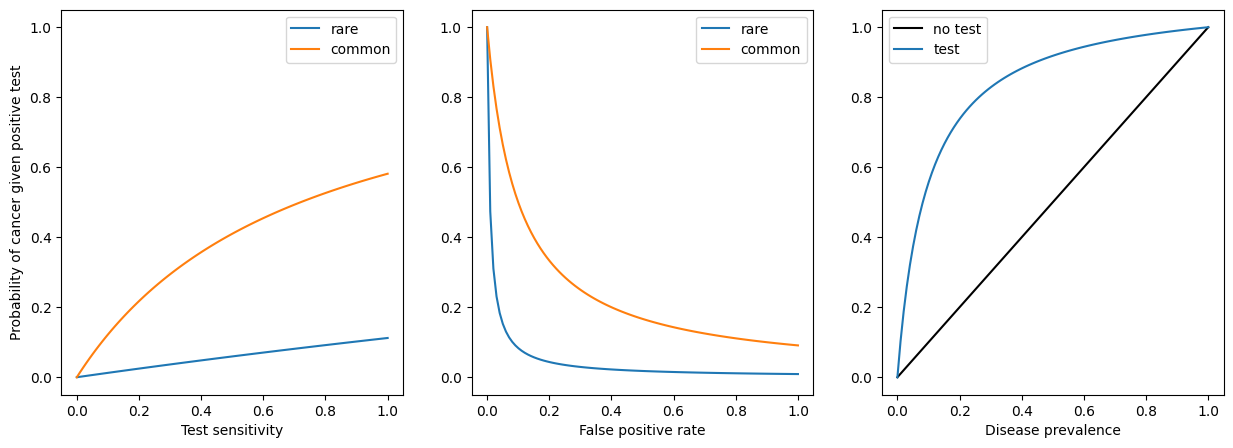

In [22]:
# Create subplot
fig, ax = plt.subplots(1, 3, figsize = (15, 5), sharey=True)

# Chart a - Test sensitivity
test_sensitivity = np.linspace(0, 1, 100)
false_positive_rate = 0.08
rare_prevalence = 0.01
common_prevalence = 0.1
ya_rare = (test_sensitivity * rare_prevalence) / (test_sensitivity * rare_prevalence + false_positive_rate * (1 - rare_prevalence))
ya_common = (test_sensitivity * common_prevalence) / (test_sensitivity * common_prevalence + false_positive_rate * (1 - common_prevalence))
yb = (0.9 * 0.01) / (0.9 * 0.01 + x * 0.99)
yc = (0.9 * x) / (0.9 * 0.01 + 0.08 * 0.99)

ax[0].plot(test_sensitivity, ya_rare, label = 'rare')
ax[0].plot(test_sensitivity, ya_common, label = 'common')
ax[0].legend()
ax[0].set_xlabel('Test sensitivity')
ax[0].set_ylabel('Probability of cancer given positive test')
ax[1].yaxis.set_tick_params(labelleft=True)

# Chart b - False positive rate
test_sensitivity = 0.9
false_positive_rate = np.linspace(0, 1, 100)
rare_prevalence = 0.01
common_prevalence = 0.1
yb_rare = (test_sensitivity * rare_prevalence) / (test_sensitivity * rare_prevalence + false_positive_rate * (1 - rare_prevalence))
yb_common = (test_sensitivity * common_prevalence) / (test_sensitivity * common_prevalence + false_positive_rate * (1 - common_prevalence))

ax[1].plot(false_positive_rate, yb_rare, label = 'rare')
ax[1].plot(false_positive_rate, yb_common, label = 'common')
ax[1].legend()
ax[1].set_xlabel('False positive rate')
ax[1].yaxis.set_tick_params(labelleft=True)

# Chart c - Disease prevalence
test_sensitivity = 0.9
false_positive_rate = 0.08
disease_prevalence = np.linspace(0, 1, 100)
yc_bftest = disease_prevalence
yc_aftest = (test_sensitivity * disease_prevalence) / (test_sensitivity * disease_prevalence + false_positive_rate * (1 - disease_prevalence))

ax[2].plot(disease_prevalence, yc_bftest, label = 'no test', color = 'black')
ax[2].plot(disease_prevalence, yc_aftest, label = 'test')
ax[2].legend()
ax[2].set_xlabel('Disease prevalence')
ax[2].yaxis.set_tick_params(labelleft=True)

# Plot the distributions
plt.show()

**Problem 3.8.4**: Assume the result of a mammography is independent when retesting an individual
(probably a terrible assumption!). How many tests (assume a positive result in each) would
need to be undertaken to ensure that the individual has a 99% probability that they have cancer?

**Answer**: Using Bayes' theorem,we can derive the probability of having the disease given that tested positive $3$ times:

$$
P(c|+++) = \frac{P(+++|c) \times P(c)}{P(+++)} = \frac{\big(P(+|c) \times P(+|c) \times P(+|c)) \times P(c)}{P(+++)} \tag{1}
$$

From $(1)$, we calculate the marginal probability $P(+++)$ as follows:

$$
\begin{align}
P(+++) &= P(+++|c) \times P(c) + P(+++|nc) \times P(nc)\tag{2}\\
       &= \big(P(+|c) \times P(+|c) \times P(+|c)) \times P(c) + \big(P(+|nc) \times P(+|nc) \times P(+|nc)) \times P(nc)\tag{3}\\
       &= \big(0.9 \times 0.9 \times 0.9) \times 0.01 + \big(0.08 \times 0.08 \times 0.08) \times 0.99 \approx 0.00779 \tag{4}\\
\end{align}
$$

So, $\footnotesize P(c|+++)=\frac{P(+|c)^3}{P(+|c)^3 \times P(c) + P(+|nc)^3 \times P(nc)} = 93.4\%$. We can generalize this expression for $n$ tests:

$$
\begin{align}
P(c|n+) &= \frac{P(+|c)^n \times P(c)}{P(+|c)^n \times P(c) + P(+|nc)^n \times P(nc)}\tag{5}\\
\end{align}
$$

Plotting $(6)$ for different $n$ we prove that after $4$ tests, the probability of having the disease is greater than $99\%$.

In [23]:
# Probability of testing positive after 3 tests P(+++)
(0.9**3)*0.01 + (0.08**3)*0.99

0.007796880000000002

In [24]:
# Bayes numerator - P(+++|c) * P(c)
(0.9**3)*0.01

0.007290000000000001

In [25]:
# P(c|+++) = P(+++|c) * P(c) / P(+++)
(0.9**3)*0.01 / ((0.9**3)*0.01 + (0.08**3)*0.99)

0.9349893803675315

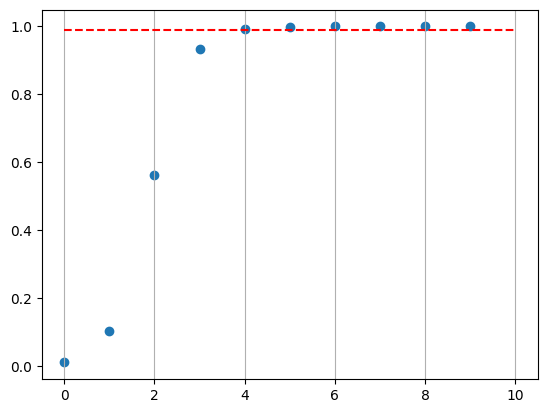

In [26]:
n = np.arange(0, 10)
p = (0.9**n)*0.01 / ((0.9**n)*0.01 + (0.08**n)*0.99)

# Plot function
plt.scatter(n, p)

# Add horizontal line at y = 0.99
plt.hlines(0.99, 0, 10, colors='red', linestyles='dashed')

# Add x-grid
plt.grid(axis='x')

**Problem 3.8.5** Now we make the more realistic assumption that the probability of testing positive
in the $nth$ trial depends on whether positive tests were achieved in the $(n −1)th$ trials, for
both individuals with cancer and those without. For a cancer status $\footnotesize k \in {{C,NC}}$:

$$
p(n+ | (n −1)+,k) = 1− (1− p(+|k ))e^{−(n−1)\isin}\tag{3.38}
$$

where $n+$ denotes testing positive in the $nth$ trial, $p(+|k)$ and $\isin ≥ 0$ determine the persistence
in test results. Assume that $p(+ |C) = 0.9$ and $p(+ |NC) = 0.08$. For $\isin = 0.15$ show that we now
need at least 17 positive test results to conclude with $99\%$ probability that a patient has cancer.

**Answer**: Based on the expresion $(5)$ in **Problem 3.8.4**, we are changing our assumption that the the probability of testing positive in multiple trials is independent. So, we can state that $P(n+|k)$ is the multiplication of the previous $m$ conditional probabilities:

$$
\begin{align}
P(n+|k) &= \prod_{m=1}^{n} P(m+|(m-1+),k)\\
        &= \prod_{m=1}^{n} \Big[1− (1− p(+|k ))e^{−(m-1)\isin}\Big]\\
\end{align}
$$

Hence, replacing $(2)$ in problem 3.8.4 expression $(5)$, we have:

$$
\begin{align}
P(c|n+) &= \frac{P(n+|c) \times P(c)}{P(n+|c) \times P(c) + P(n+|nc) \times P(nc)}\\
        &= \frac{\prod_{m=1}^{n} \Big[1− (1− p(+|c ))e^{−(m-1)\isin}\Big] \times P(c)}{\prod_{m=1}^{n} \Big[1− (1− p(+|c ))e^{−(m-1)\isin}\Big] \times P(c) + \prod_{m=1}^{n} \Big[1− (1− p(+|nc ))e^{−(m-1)\isin}\Big] \times P(nc)}\\
        &= \frac{\prod_{m=1}^{n} \Big[1− (1− 0.9)e^{−(m-1)\isin}\Big] \times 0.01}{\prod_{m=1}^{n} \Big[1− (1− 0.9)e^{−(m-1)\isin}\Big] \times 0.01 + \prod_{m=1}^{n} \Big[1− (1− 0.08)e^{−(m-1)\isin}\Big] \times 0.99}\\
\end{align}
$$

Plotting $(6)$ for different $n$ we prove that after $17$ tests, the probability of having the disease is greater than $99\%$.

In [40]:
# Define number of trials space
n = np.arange(0, 21, 1)

# Define p(n+|k) function
def p_nplus_given_k(m, pk, eps):
    return 1 - (1 - pk) * np.exp(-(m - 1) * eps)

# Define prod function
def prod(m, pk, eps):
    if m == 0:
        return 1
    if m == 1:
        return p_nplus_given_k(m, pk, eps)
    else:
        return p_nplus_given_k(m, pk, eps) * prod(m - 1, pk, eps)
    
# Define P(c|n+) function
def p_c_given_nplus(n, pc, pnc, eps):
    return (prod(n, pc, eps) * 0.01) / ((prod(n, pc, eps) * 0.01) + (prod(n, pnc, eps) * 0.99))

# Vectorize prod function
p = np.vectorize(p_c_given_nplus)(n=n, pc=0.9, pnc=0.08, eps=0.15)

After 17 positive tests, we can conclude that the probability of cancer is 99%.


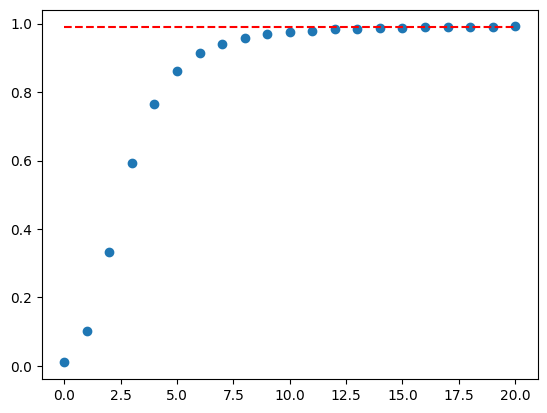

In [42]:
# Plot function
plt.scatter(n, p)

# Add horizontal line at y = 0.99
plt.hlines(0.99, 0, 20, colors='red', linestyles='dashed')

# Get x closest to y = 0.99
n[np.argmin(np.abs(p - 0.99))]
print(f'After {n[np.argmin(np.abs(p - 0.99))]} positive tests, we can conclude that the probability of cancer is 99%.')
